# Case Aquisição

O escopo deste projeto está dividido nos seguinte tópicos:
- Avaliação e limpeza de dados
- Análise exploratória
- Pré-processamento
- Modelagem
- Tuning


***

### Importações e configurações

In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from time import time
from datetime import datetime
from datetime import date
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn import tree
import warnings

# Oculta os warnings dos códigos
warnings.filterwarnings('ignore')

# Aumenta a fonte nos gráficos
plt.rcParams.update({'font.size': 16})

### Leitura de dados

In [354]:
df = pd.read_csv('dataset/Planilha_1.csv', sep = ';')
df2 = pd.read_csv('dataset/Planilha_2.csv', sep = ';')

***

## Limpeza de dados

### Avaliação

#### Planilha_1.csv

In [355]:
df.sample(10)

,ID,QT_TOTAL_HIT_PAYWALL,DIASNAVEGADOS,NOTICIASLIDAS,VISITAS_CAPA,USOU_APP
5395,51596,0,20,8,0,NAO
5013,362499,0,1,6,0,NAO
3771,194923,0,3,3,2,NAO
4614,244164,27,28,99,149,SIM
259,636,0,0,0,0,NAO
4844,112756,24,17,15,0,NAO
945,103568,0,2,1,0,NAO
5165,93876,0,3,4,0,NAO
785,264374,0,21,23,0,NAO
2929,305332,2,4,5,0,NAO


In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 6 columns):
ID                      5600 non-null int64
QT_TOTAL_HIT_PAYWALL    5600 non-null int64
DIASNAVEGADOS           5600 non-null int64
NOTICIASLIDAS           5600 non-null int64
VISITAS_CAPA            5600 non-null int64
USOU_APP                5600 non-null object
dtypes: int64(5), object(1)
memory usage: 262.6+ KB


In [357]:
df.describe()

,ID,QT_TOTAL_HIT_PAYWALL,DIASNAVEGADOS,NOTICIASLIDAS,VISITAS_CAPA
count,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000
mean,165460.766786,6.795000,11.600714,17.768036,34.611250
std,116184.700778,25.313927,14.711436,72.011940,126.670657
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,58354.250000,0.000000,2.000000,1.000000,0.000000
50%,163883.000000,0.000000,5.000000,3.000000,0.000000
75%,265199.000000,3.000000,16.000000,8.000000,7.000000
max,371187.000000,894.000000,60.000000,1773.000000,2963.000000


In [358]:
df[df.duplicated(keep=False)]

,ID,QT_TOTAL_HIT_PAYWALL,DIASNAVEGADOS,NOTICIASLIDAS,VISITAS_CAPA,USOU_APP


#### Planilha_2.csv

In [359]:
df2.sample(10)

,ID,PERFIL,PES_GENERO,PES_NASCIMENTO_DATA,ATR_PF_GEO_RENDA_FAM
2036,354780,PROSPECT,F,NaN,NaN
1060,230911,PROSPECT,F,NaN,NaN
4715,258219,PROSPECT,M,NaN,DE 4SM ATE 8SM
2619,310029,PROSPECT,F,09.09.1976 00:00:00,ACIMA DE 25SM
1339,72282,PROSPECT,M,05.01.1986 00:00:00,DE 3SM ATE 4SM
1498,213404,PROSPECT,F,NaN,NaN
3721,300070,PROSPECT,F,NaN,DE 3SM ATE 4SM
5151,55080,PROSPECT,F,NaN,NaN
593,97,ASSINANTE,M,01.01.1900 00:00:00,NaN
1484,304640,PROSPECT,M,NaN,DE 4SM ATE 8SM


In [360]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 5 columns):
ID                      5600 non-null int64
PERFIL                  5600 non-null object
PES_GENERO              5600 non-null object
PES_NASCIMENTO_DATA     1935 non-null object
ATR_PF_GEO_RENDA_FAM    2648 non-null object
dtypes: int64(1), object(4)
memory usage: 218.8+ KB


In [361]:
df2.describe()

,ID
count,5600.000000
mean,165460.766786
std,116184.700778
min,3.000000
25%,58354.250000
50%,163883.000000
75%,265199.000000
max,371187.000000


In [362]:
df2[df2.duplicated(keep=False)]

,ID,PERFIL,PES_GENERO,PES_NASCIMENTO_DATA,ATR_PF_GEO_RENDA_FAM


### Problemas detectados

- Os dados estão em dois datasets diferentes.
- O tipo de dado da coluna PES_NASCIMENTO_DATA está incorreto.
- PES_NASCIMENTO_DATA com datas inválidas.
- PES_NASCIMENTO_DATA e ATR_PF_GEO_RENDA_FAM com dados ausentes.

### Limpeza

#### Backup dos datasets originais

In [363]:
df_copy = df.copy()
df2_copy = df2.copy()

***

#### Definição

Unir os dois datasets.

#### Código

In [364]:
df = pd.merge(left = df, right = df2, left_on = 'ID', right_on = 'ID', how = 'left')
df = df.drop('ID', axis=1)

#### Teste

In [365]:
df.sample(10)

,QT_TOTAL_HIT_PAYWALL,DIASNAVEGADOS,NOTICIASLIDAS,VISITAS_CAPA,USOU_APP,PERFIL,PES_GENERO,PES_NASCIMENTO_DATA,ATR_PF_GEO_RENDA_FAM
3747,10,11,0,64,SIM,PROSPECT,M,NaN,DE 3SM ATE 4SM
2636,0,1,1,0,NAO,PROSPECT,F,12.12.1958 00:00:00,DE 8SM ATE 14SM
3060,0,16,0,20,NAO,PROSPECT,M,NaN,NaN
3384,0,2,2,0,NAO,PROSPECT,M,23.02.1989 00:00:00,DE 14SM ATE 25SM
5129,0,1,1,0,NAO,PROSPECT,M,NaN,DE 4SM ATE 8SM
271,0,0,0,0,NAO,ASSINANTE,F,01.01.1900 00:00:00,DE 8SM ATE 14SM
4210,22,34,0,99,SIM,PROSPECT,M,NaN,NaN
1432,0,2,0,2,SIM,PROSPECT,M,NaN,DE 2SM ATE 3SM
375,16,0,0,0,NAO,ASSINANTE,M,01.01.1900 00:00:00,DE 3SM ATE 4SM
3850,0,7,4,1,NAO,PROSPECT,M,NaN,DE 4SM ATE 8SM


***

#### Definição

Trocar o tipo de dado da coluna PES_NASCIMENTO_DATA para timestamp.

#### Código

In [366]:
df['PES_NASCIMENTO_DATA'] = pd.to_datetime(df['PES_NASCIMENTO_DATA'], errors = 'coerce')

#### Teste

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5600 entries, 0 to 5599
Data columns (total 9 columns):
QT_TOTAL_HIT_PAYWALL    5600 non-null int64
DIASNAVEGADOS           5600 non-null int64
NOTICIASLIDAS           5600 non-null int64
VISITAS_CAPA            5600 non-null int64
USOU_APP                5600 non-null object
PERFIL                  5600 non-null object
PES_GENERO              5600 non-null object
PES_NASCIMENTO_DATA     1925 non-null datetime64[ns]
ATR_PF_GEO_RENDA_FAM    2648 non-null object
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 437.5+ KB


***

#### Definição

Corrigir datas inválidas da coluna PES_NASCIMENTO_DATA

#### Código

In [368]:
df['PES_NASCIMENTO_DATA'][(df.PES_NASCIMENTO_DATA > '2001-06-15') | (df.PES_NASCIMENTO_DATA < '1919-06-15')] = np.nan

#### Teste

In [369]:
df[(df.PES_NASCIMENTO_DATA > '2001-06-15') | (df.PES_NASCIMENTO_DATA < '1919-06-15')]

,QT_TOTAL_HIT_PAYWALL,DIASNAVEGADOS,NOTICIASLIDAS,VISITAS_CAPA,USOU_APP,PERFIL,PES_GENERO,PES_NASCIMENTO_DATA,ATR_PF_GEO_RENDA_FAM


***

#### Definição

Preencher dados ausentes com `None`

#### Código

In [370]:
df = df.astype(object).replace(np.nan, 'None')

#### Teste

In [371]:
df.sample(15)

,QT_TOTAL_HIT_PAYWALL,DIASNAVEGADOS,NOTICIASLIDAS,VISITAS_CAPA,USOU_APP,PERFIL,PES_GENERO,PES_NASCIMENTO_DATA,ATR_PF_GEO_RENDA_FAM
405,0,0,0,0,NAO,ASSINANTE,F,None,None
2222,0,1,1,0,NAO,PROSPECT,F,None,None
4357,0,21,25,0,NAO,PROSPECT,F,1987-05-08 00:00:00,DE 8SM ATE 14SM
2152,0,2,1,0,NAO,PROSPECT,F,None,DE 3SM ATE 4SM
3166,46,29,10,0,NAO,PROSPECT,M,1980-08-30 00:00:00,ACIMA DE 25SM
4673,0,1,0,0,NAO,PROSPECT,M,1979-11-23 00:00:00,DE 8SM ATE 14SM
1330,7,10,0,48,SIM,PROSPECT,M,None,None
3027,2,27,17,42,SIM,PROSPECT,M,None,None
1430,0,22,58,0,NAO,PROSPECT,M,1975-09-08 00:00:00,DE 14SM ATE 25SM
4180,0,1,0,1,NAO,PROSPECT,F,None,None


***

## Análise exploratória

### Distribuição de variáveis quantitativas

Distribuição de QT_TOTAL_HIT_PAYWALL


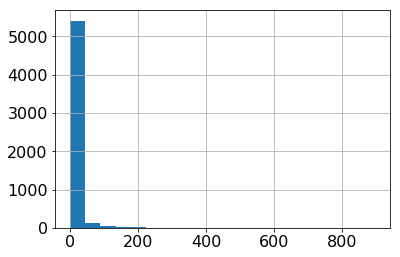

Distribuição de DIASNAVEGADOS


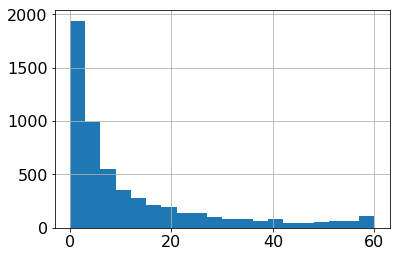

Distribuição de NOTICIASLIDAS


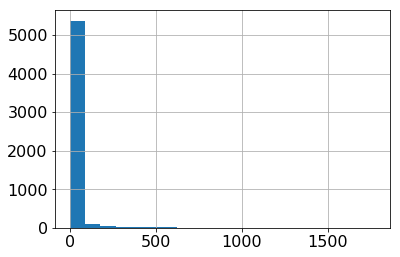

Distribuição de VISITAS_CAPA


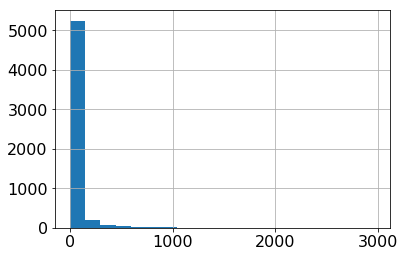

In [372]:
# Para cada coluna mencionada, gera e exibe a sua distribuição
for col in ['QT_TOTAL_HIT_PAYWALL', 'DIASNAVEGADOS', 'NOTICIASLIDAS', 'VISITAS_CAPA']:
    hist = df[col].hist(bins=20)
    print("Distribuição de {}".format(col))
    plt.show()

### Tratamento de outliers

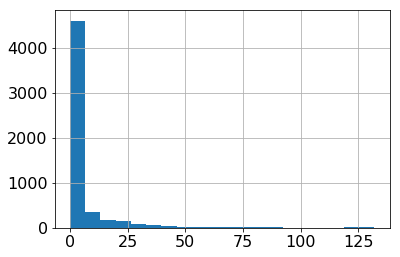

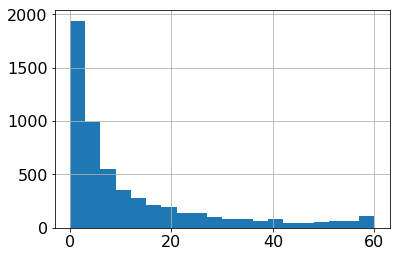

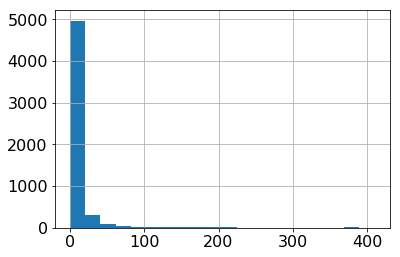

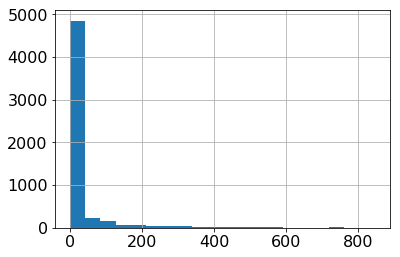

In [373]:
# Função que encontra os outliers e os substitui pela mediana correspondentes
def outliers(col):
    q1, q3 = np.percentile(df[col],[2.5,97.5])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)
    x = df[(df[col] > lower_bound) | (df[col] < upper_bound)][col].median()
    df[col][(df[col] < lower_bound) | (df[col] > upper_bound)] = x
    hist = df[col].hist(bins=20)
    plt.show()

for col in ['QT_TOTAL_HIT_PAYWALL', 'DIASNAVEGADOS', 'NOTICIASLIDAS', 'VISITAS_CAPA']:
    outliers(col)

***

### Gênero

- Qual a porcentagem de pessoas por gênero?

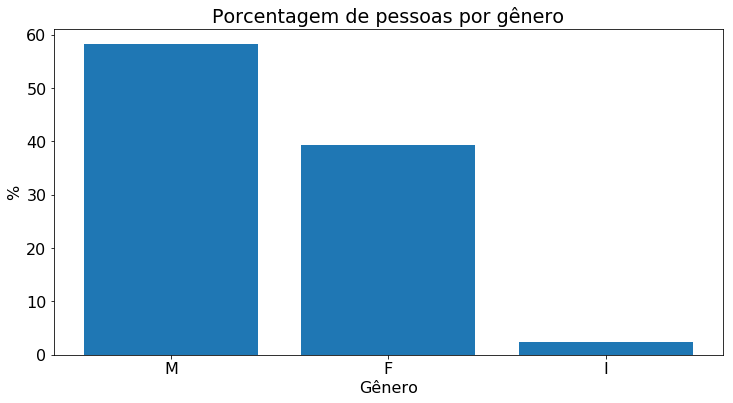

In [374]:
df_temp = df['PES_GENERO'].value_counts(normalize = True)
fig,ax = plt.subplots(figsize = (12,6))
ax.bar(df_temp.index, df_temp.values*100, width = 0.8)
ax.set_ylabel('%')
ax.set_xlabel('Gênero')
plt.title("Porcentagem de pessoas por gênero")
plt.show()

### Uso do app

- Qual a porcentagem de pessoas que utilizam o app na amostra?

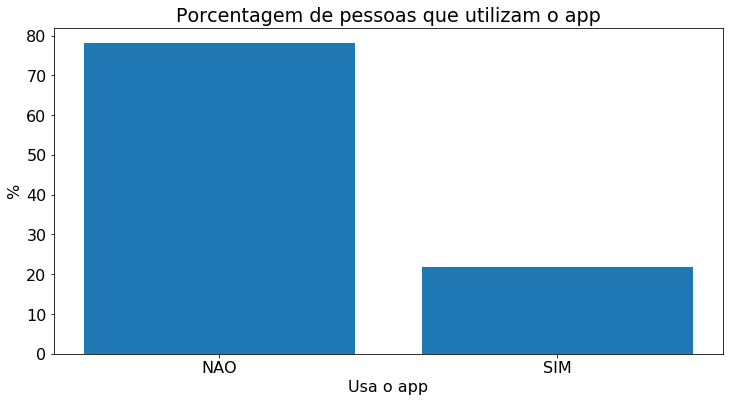

In [375]:
df_temp = df['USOU_APP'].value_counts(normalize = True)
fig,ax = plt.subplots(figsize = (12,6))
ax.bar(df_temp.index, df_temp.values*100, width = 0.8)
ax.set_ylabel('%')
ax.set_xlabel('Usa o app')
plt.title("Porcentagem de pessoas que utilizam o app")
plt.show()

***

### Assinantes vs Prospects
- Qual a porcentagem de pessoas que são assinantes?

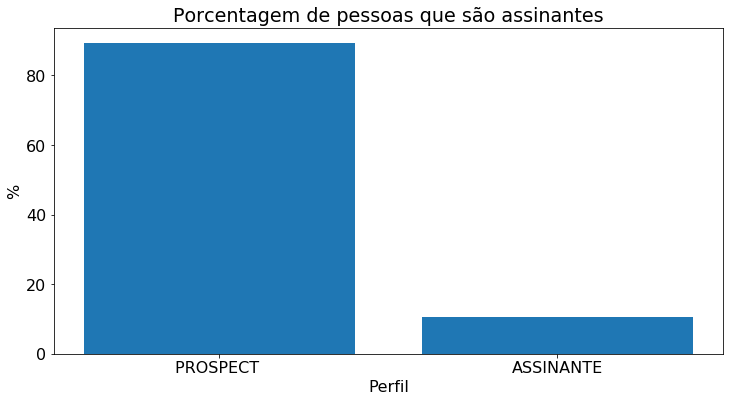

In [376]:
df_temp = df['PERFIL'].value_counts(normalize = True)
fig,ax = plt.subplots(figsize = (12,6))
ax.bar(df_temp.index, df_temp.values*100, width = 0.8)
ax.set_ylabel('%')
ax.set_xlabel('Perfil')
plt.title("Porcentagem de pessoas que são assinantes")
plt.show()

***

### Distribuição de renda dos assinantes
- Como é a distribuição de renda dos assinantes da amostra?

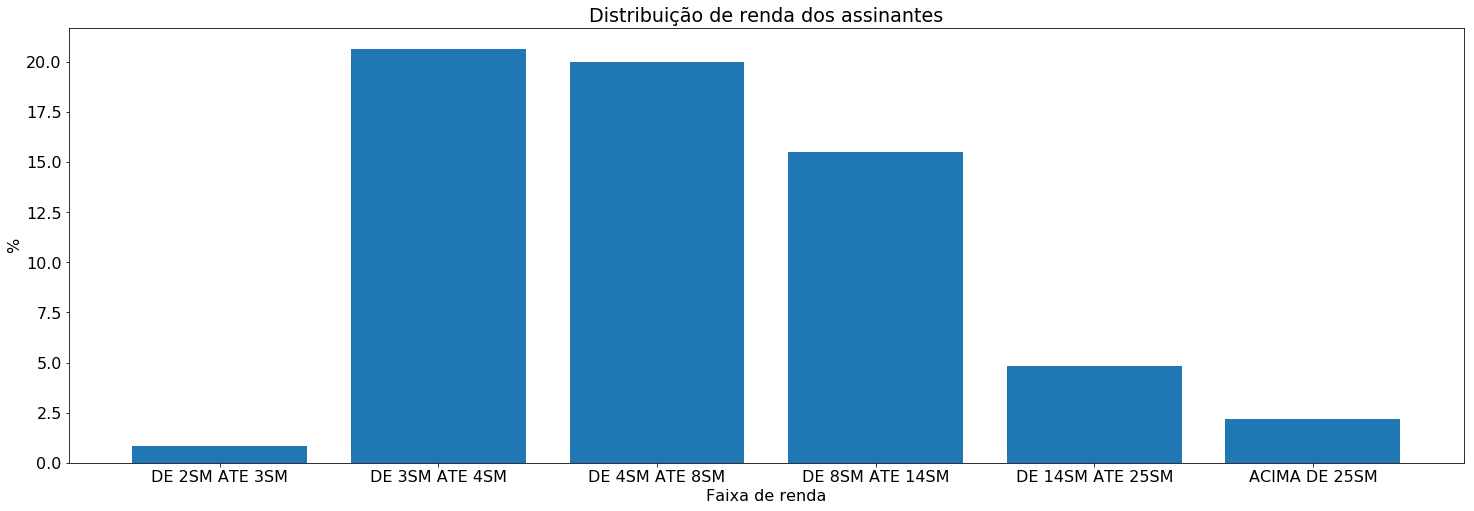

In [377]:
df_temp = df['ATR_PF_GEO_RENDA_FAM'][(df.PERFIL == 'ASSINANTE')].value_counts(normalize = True)
df_temp = df_temp[['ATE 1SM', 'DE 2SM ATE 3SM', 'DE 3SM ATE 4SM', 'DE 4SM ATE 8SM', 'DE 8SM ATE 14SM', 'DE 14SM ATE 25SM', 'ACIMA DE 25SM']]
fig,ax = plt.subplots(figsize = (25,8))
ax.bar(df_temp.index, df_temp.values*100, width = 0.8)
ax.set_ylabel('%')
ax.set_xlabel('Faixa de renda')
plt.title("Distribuição de renda dos assinantes")
plt.show()

***

### Correlações

In [378]:
print(df.corr())

                      QT_TOTAL_HIT_PAYWALL  DIASNAVEGADOS  NOTICIASLIDAS  \
QT_TOTAL_HIT_PAYWALL              1.000000       0.459818       0.061129   
DIASNAVEGADOS                     0.459818       1.000000       0.539521   
NOTICIASLIDAS                     0.061129       0.539521       1.000000   
VISITAS_CAPA                      0.317927       0.666299       0.343202   

                      VISITAS_CAPA  
QT_TOTAL_HIT_PAYWALL      0.317927  
DIASNAVEGADOS             0.666299  
NOTICIASLIDAS             0.343202  
VISITAS_CAPA              1.000000  


***

## Pré-procesamento

#### Divisão de features e target

In [379]:
target = df['PERFIL']
features = df.drop('PERFIL', axis = 1)

***

#### Transformação de data de nascimento para idade

In [380]:
# Função para calcular a idade baseada na diferença entre a data do dia atual e a data do nascimento
# Retorna a idade em um número inteiro
def calcula_idade(nascimento):
    nascimento = nascimento.date()
    hoje = date.today()
    return hoje.year - nascimento.year - ((hoje.month, hoje.day) < (nascimento.month, nascimento.day))

# Aplica a função para na variável da data de nascimento
features['IDADE'] = pd.to_datetime(features['PES_NASCIMENTO_DATA'], errors = 'coerce').apply(calcula_idade)

# Remove a coluna da data de nascimento
features = features.drop('PES_NASCIMENTO_DATA', axis = 1)

# Preenche os dados ausentes com a média das idades
features['IDADE'] = features['IDADE'].fillna(features['IDADE'].mean())

#### Distribuição de idade

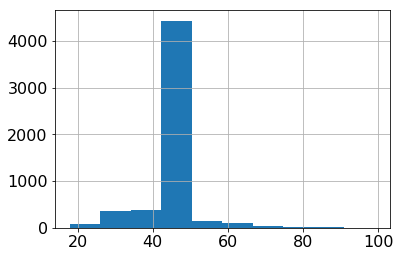

In [381]:
features['IDADE'].hist()

***

#### Normalização

In [382]:
scaler = MinMaxScaler()
columns = ['QT_TOTAL_HIT_PAYWALL', 'DIASNAVEGADOS', 'NOTICIASLIDAS', 'VISITAS_CAPA', 'IDADE']

# Aplica a normalização nas colunas mencionadas
features[columns] = scaler.fit_transform(features[columns])

features.head()

,QT_TOTAL_HIT_PAYWALL,DIASNAVEGADOS,NOTICIASLIDAS,VISITAS_CAPA,USOU_APP,PES_GENERO,ATR_PF_GEO_RENDA_FAM,IDADE
0,0.000000,0.000000,0.000000,0.000000,NAO,F,DE 4SM ATE 8SM,0.246914
1,0.007576,0.383333,0.000000,0.428402,SIM,M,DE 3SM ATE 4SM,0.301414
2,0.037879,0.266667,0.026829,0.004734,NAO,M,None,0.301414
3,0.068182,0.216667,0.019512,0.029586,SIM,F,ACIMA DE 25SM,0.301414
4,0.007576,0.016667,0.000000,0.010651,SIM,M,DE 4SM ATE 8SM,0.283951


***

#### One hot encoding

In [383]:
features = pd.get_dummies(features)

target = target.replace({'PROSPECT ':0, 'ASSINANTE':1})

***

#### Split em dataset de treino e teste

In [384]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

print("Dataset de treino tem {} registros.".format(X_train.shape[0]))
print("Dataset de teste tem {} registros.".format(X_test.shape[0]))

Dataset de treino tem 4480 registros.
Dataset de teste tem 1120 registros.


***

## Benchmark

#### Aplicação dos dados em uma árvore de decisão

In [385]:
# Treinamento do benchmark com uma árvore de decisão
learner = tree.DecisionTreeClassifier()
learner = learner.fit(X_train, y_train)

predictions_test = learner.predict(X_test)
predictions_train = learner.predict(X_train)

print("{} treinado.".format(learner.__class__.__name__))
print("acc_train: {}".format(accuracy_score(y_train, predictions_train)))
print("acc_test: {}".format(accuracy_score(y_test, predictions_test)))
print("f_train: {}".format(f1_score(y_train, predictions_train)))
print("f_test: {}".format(f1_score(y_test, predictions_test)))

DecisionTreeClassifier treinado.
acc_train: 0.996875
acc_test: 0.9089285714285714
f_train: 0.9849785407725321
f_test: 0.6076923076923078


***

## Modelo

#### Pipeline de treinamento e predição

In [386]:
# Função para testar algoritmos de uma maneira fácil
def train_predict(learner, X_train, y_train, X_test, y_test): 
    
    results = {}

    learner = learner.fit(X_train, y_train)
    
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    
    results['acc_train'] = accuracy_score(y_train, predictions_train)
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    results['f_train'] = f1_score(y_train, predictions_train)
    results['f_test'] = f1_score(y_test, predictions_test)
    
    print("{} treinado.".format(learner.__class__.__name__))
        
    return results

***

#### Validação inicial do modelo

In [387]:
clf_A = RandomForestClassifier()
clf_B = GradientBoostingClassifier()
clf_C = KNeighborsClassifier()

results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    results[clf_name] = train_predict(clf, X_train, y_train, X_test, y_test)

results

RandomForestClassifier treinado.
GradientBoostingClassifier treinado.
KNeighborsClassifier treinado.


{'RandomForestClassifier': {'acc_train': 0.9897321428571428,
  'acc_test': 0.9464285714285714,
  'f_train': 0.9491150442477876,
  'f_test': 0.7115384615384616},
 'GradientBoostingClassifier': {'acc_train': 0.9558035714285714,
  'acc_test': 0.9508928571428571,
  'f_train': 0.7367021276595745,
  'f_test': 0.7236180904522613},
 'KNeighborsClassifier': {'acc_train': 0.9455357142857143,
  'acc_test': 0.9375,
  'f_train': 0.6620498614958448,
  'f_test': 0.6568627450980392}}

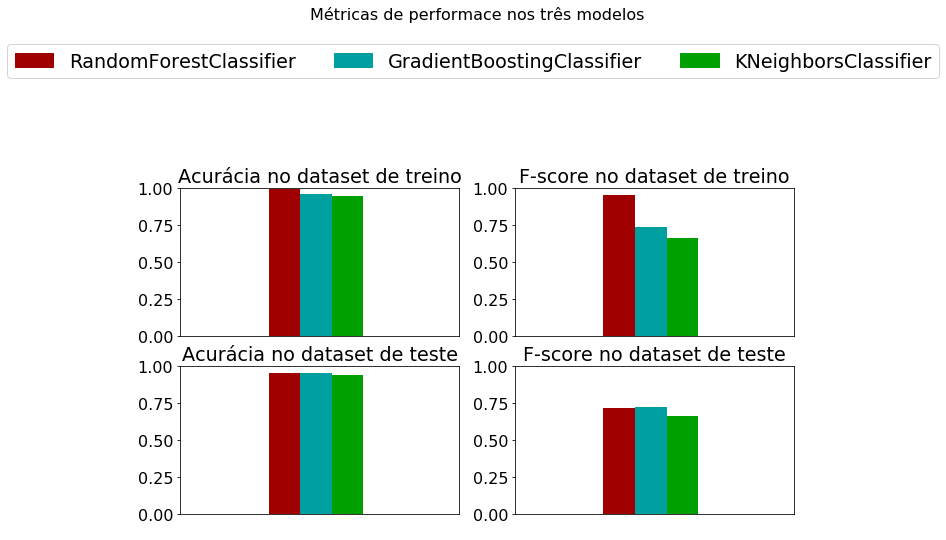

In [388]:
# Função para gerar o gráfico comparativo das métricas entre os algoritmos
def evaluate(results):

    fig, ax = plt.subplots(2, 2, figsize = (11,6))

    bar_width = 0.34
    colors = ['#A00000','#00A0A0','#00A000']
    
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['acc_train', 'f_train', 'acc_test', 'f_test']):
            ax[j//2, j%2].bar(0.12+1*k*bar_width, results[learner][metric], width = bar_width, color = colors[k])
            ax[j//2, j%2].set_xlabel(" ")
            ax[j//2, j%2].set_xlim((-1, 2))

    ax[0, 0].set_title("Acurácia no dataset de treino")
    ax[0, 1].set_title("F-score no dataset de treino")
    ax[1, 0].set_title("Acurácia no dataset de teste")
    ax[1, 1].set_title("F-score no dataset de teste")
    
    ax[0, 0].set_ylim((0, 1))
    ax[0, 1].set_ylim((0, 1))
    ax[1, 0].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    
    ax[0, 0].xaxis.set_major_locator(plt.NullLocator())
    ax[0, 1].xaxis.set_major_locator(plt.NullLocator())
    ax[1, 0].xaxis.set_major_locator(plt.NullLocator())
    ax[1, 1].xaxis.set_major_locator(plt.NullLocator())
    
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches, bbox_to_anchor = (-0.15, 3.17), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'large')
    
    plt.suptitle("Métricas de performace nos três modelos", fontsize = 16, y = 1.3)
    plt.show()
    
evaluate(results)

***

#### Tuning do modelo

In [390]:
clf = GradientBoostingClassifier()

# Parâmetros e valores para serem testados no GridSearchCV
parameters = {
    'n_estimators': [100, 200, 500, 1000],
    "learning_rate": [0.01, 0.05, 0.075, 0.1],
    "subsample": [0.5, 0.8, 0.9, 1.0],
}

scorer = make_scorer(f1_score)

grid_obj = GridSearchCV(clf, parameters, scoring = scorer)

grid_fit = grid_obj.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_

predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

print("Modelo não-otimizado\n------")
print("Acurácia no dataset de teste: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score no dataset de teste: {:.4f}".format(f1_score(y_test, predictions)))
print("\n Modelo otimizado\n------")
print("Acurácia final no dataset de teste: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score final no dataset de teste: {:.4f}".format(f1_score(y_test, best_predictions)))
print("\n Modelo final\n------")
print(best_clf)


Modelo não-otimizado
------
Acurácia no dataset de teste: 0.9509
F-score no dataset de teste: 0.7236

 Modelo otimizado
------
Acurácia final no dataset de teste: 0.9500
F-score final no dataset de teste: 0.7358

 Modelo final
------
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=500, presort='auto', random_state=None,
              subsample=0.5, verbose=0, warm_start=False)
